<a href="https://colab.research.google.com/github/Alice-cruz/desafio_pandas/blob/main/deafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivação

Esse relatório foi desenvolvido para analisar 4 lojas e verificar a loja com maior desempenho entre ela.
Analisando Faturamento, Avaliações e Frete

# Desenvolvimento

Aqui trabalhamos com a ingestão dos dados. Criamos uma categoria de loja para cada base e concatenamos todos os dados em um unico DF

### Importação dos dados



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [14]:
loja1['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

df_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)
df_lojas.head()


In [48]:
df_lojas[['Preço', 'Frete', 'Valor Total']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preço        9435 non-null   float64
 1   Frete        9435 non-null   float64
 2   Valor Total  9435 non-null   float64
dtypes: float64(3)
memory usage: 221.3 KB


In [49]:
df_lojas['Data da Compra'] = pd.to_datetime(
    df_lojas['Data da Compra'],
    format='%d/%m/%Y')

df_lojas['Valor Total'] = round(df_lojas['Preço'] + df_lojas['Frete'],2)
df_lojas.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja,valor_total,Valor Total
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1,228.329790,228.33
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1,267.584305,267.58
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1,300.772681,300.77
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1,1064.657344,1064.66
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1,473.954689,473.95


In [31]:
df_lojas.describe()

,Preço,Frete,Data da Compra,Avaliação da compra,Quantidade de parcelas,lat,lon,valor_total,Valor Total
count,9435.000000,9435.000000,9435,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,622.309570,33.167002,2021-08-16 07:36:48.076311808,4.014520,2.927398,-20.534059,-47.171176,655.476572,655.476572
min,10.070000,0.000000,2020-01-01 00:00:00,1.000000,1.000000,-30.170000,-70.550000,10.070000,10.070000
25%,73.610000,4.009423,2020-10-27 00:00:00,3.000000,1.000000,-22.250000,-48.790000,77.573282,77.573282
50%,295.350000,15.648481,2021-08-22 00:00:00,5.000000,1.000000,-22.190000,-48.790000,310.756900,310.756900
75%,884.405000,46.591030,2022-06-04 12:00:00,5.000000,4.000000,-18.100000,-44.380000,931.472497,931.472497
max,3969.380000,216.707633,2023-03-31 00:00:00,5.000000,24.000000,1.990000,-36.590000,4181.047060,4181.047060
std,787.094508,41.973711,NaN,1.390518,2.802776,5.399153,4.177887,828.976991,828.976991


#1. Análise do faturamento



In [50]:
df_lojas.groupby('loja')['Valor Total'].sum()


,Valor Total
loja,
Loja 1,1616346.99
Loja 2,1567773.29
Loja 3,1542047.52
Loja 4,1458253.56


# 2. Vendas por Categoria

In [51]:
df_lojas.groupby('Categoria do Produto')['Valor Total'].sum()

,Valor Total
Categoria do Produto,
brinquedos,103502.37
eletrodomesticos,1860198.65
eletronicos,2332048.06
esporte e lazer,200891.95
instrumentos musicais,489701.46
livros,53007.35
moveis,1064149.67
utilidades domesticas,80921.85


# 3. Média de Avaliação das Lojas


In [53]:
df_lojas.groupby('loja')['Avaliação da compra'].mean()

,Avaliação da compra
loja,
Loja 1,3.976685
Loja 2,4.037304
Loja 3,4.048326
Loja 4,3.995759


# 4. Produtos Mais e Menos Vendidos

In [70]:
vendas_produto = df_lojas['Produto'].value_counts()

mais_vendido = vendas_produto.head(1)
menos_vendido = vendas_produto.tail(1)


# 5. Frete Médio por Loja

In [71]:
df_lojas.groupby('loja')['Frete'].mean()

,Frete
loja,
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


# Gráfico

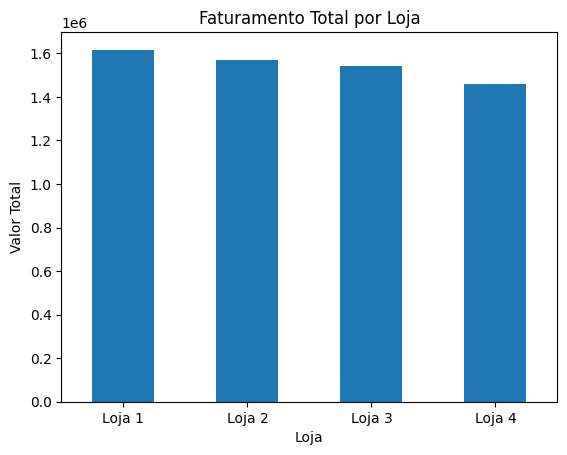

In [72]:
import matplotlib.pyplot as plt

df_lojas.groupby('loja')['Valor Total'].sum().plot(kind='bar')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Total')
plt.xticks(rotation=0)
plt.show()


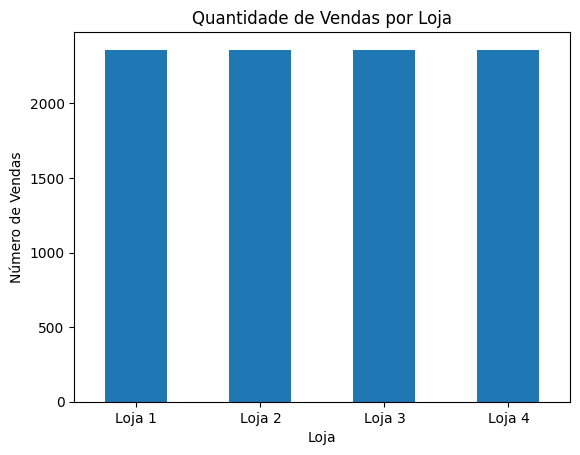

In [73]:
df_lojas.groupby('loja').size().plot(kind='bar')
plt.title('Quantidade de Vendas por Loja')
plt.xlabel('Loja')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=0)
plt.show()


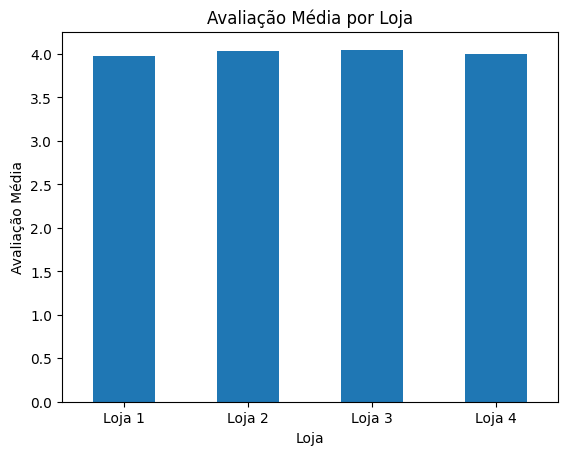

In [75]:
df_lojas.groupby('loja')['Avaliação da compra'].mean().plot(kind='bar')
plt.title('Avaliação Média por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.xticks(rotation=0)
plt.show()


# Conclusão

* O faturamento total das lojas.
* As categorias de produtos mais e menos vendidas.
* A média das avaliações de clientes por loja
* Os produtos mais e menos vendidos.
* O frete médio de cada loja.

A melhor loja para venda é a loja 2
Ela é a segunda em faturamento, mas tem boas avaliações e seu preço médio de frente também não é tão alto